# I) PROJECT INTRODUCTION


**In this project, we try to solve the challenge of building a machine learning model that predicts which Tweets are about real disasters (label 1) and which one’s aren’t (label 0), by using a dataset of 7k+ tweets for training and 3k+ for out of time testing, which were already labeled manually.**

# II) Exploratory Data Analysis (EDA) 


**At this session let's do data inspection, looking through statistical info and several charts including cleaning or transform data <insert purpose>**

### first thing first, import tools for analysis, visuallization and modeling

In [2]:
# install necessary library for model processing
!pip install nltk
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1.tar.gz
!pip install --upgrade spacy
!pip install --upgrade spacy-transformers
!pip install tensorflow-text
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 1.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Using cached spacy-3.7.5-cp312-cp312-macosx_11_0_arm64.whl.metadata (27 kB)
  Using cached thinc-8.2.5-cp312-cp312-macosx_11_0_arm64.whl.metadata (15 kB)
  Using cached blis-0.7.11-cp312-cp312-macosx_11_0_arm64.whl.metadata (7.4 kB)
Using cached spacy-3.7.5-cp312-cp312-macosx_11_0_arm64.whl (6.1 MB)
Using cached thinc-8.2.5-cp312-cp312-macosx_11_0_arm64.whl (760 kB)
Using cached blis-0.7.11-cp312-cp312-macosx_11_0_arm64.whl (1.1 MB)
  Attempting uninstall: blis
    Found existing installation: blis 1.3.3
    Uninstalling blis-1.3.3:
      Successfully uninstalled blis-1.3.3
  Attempting uninstall: thinc
    Found existing installation: thinc 8.3.10
    Uninstalling thinc-8.3.10:
      Successfully uninstalled thinc-8.3.10
  Attempting uninstall: spacy
    Found existing installation: spacy 3.8.11
    Uninstalling spacy-3.8.11:
      Successfully uninstall

In [3]:
#import necessary library
import pandas as pd
import numpy as np
import os


In [4]:
pd.options.display.max_columns
pd.options.display.max_rows
import os, math
 
#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
 
#for text cleaning / preprocessing
import string, re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import re
import torch
from typing import List
import requests
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
import spacy
from bs4 import BeautifulSoup
import keras_hub
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import spacy
 
#for data analysis and modeling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn import decomposition
 
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package punkt to /Users/Gaby/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/Gaby/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 1. explore dataset


In [5]:
path_train = 'train.csv'
data_train = pd.read_csv(path_train)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
df_train = data_train.copy()

Here we have 7613 records, however there are missing value in keyword and location, let's look on them later on data inspection to decide method of handling those missing.

In [7]:
df_train['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

here we see the Tweet include not only words but also special character, which may have certain implication to the news as actual disaster or not.

### 2. Data inspection

In [8]:
pd.set_option('display.max_colwidth', None)
pd.concat([df_train[df_train['target'] == 1].head(), 
           df_train[df_train['target'] == 0].tail()
          ])

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Lion gig tonight. Hearing is wrecked. http://t.co/oMNBAtJEAO,0
7582,10834,wrecked,NaN,Cramer: Iger's 3 words that wrecked Disney's stock - CNBC http://t.co/N6RBnHMTD4,0
7584,10837,NaN,NaN,These boxes are ready to explode! Exploding Kittens finally arrived! gameofkittens #explodingkittensÛ_ https://t.co/TFGrAyuDC5,0
7587,10841,NaN,NaN,Sirens everywhere!,0
7593,10848,NaN,NaN,I just heard a really loud bang and everyone is asleep great,0


for row missing keyword and location, consider it may have certain potential on prediction, we will fill in by 'unknown'.

In [9]:
df_train[['keyword', 'location']] = df_train[['keyword', 'location']].fillna('unknown')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


we have 7613 records for training model.

In [10]:
# check the max - min length of Tweet to understand data complexity for training

df_train['text_length'] = df_train['text'].apply(len)
df_train.groupby('target')['text_length'].agg(['min', 'max', 'mean'])

,min,max,mean
target,,,
0,7,157,95.706817
1,14,151,108.113421


**visuallize data to observe distribution, to understand what can be challenge for model building (i.e data imbalance issue, heavy text issue, ect.)**

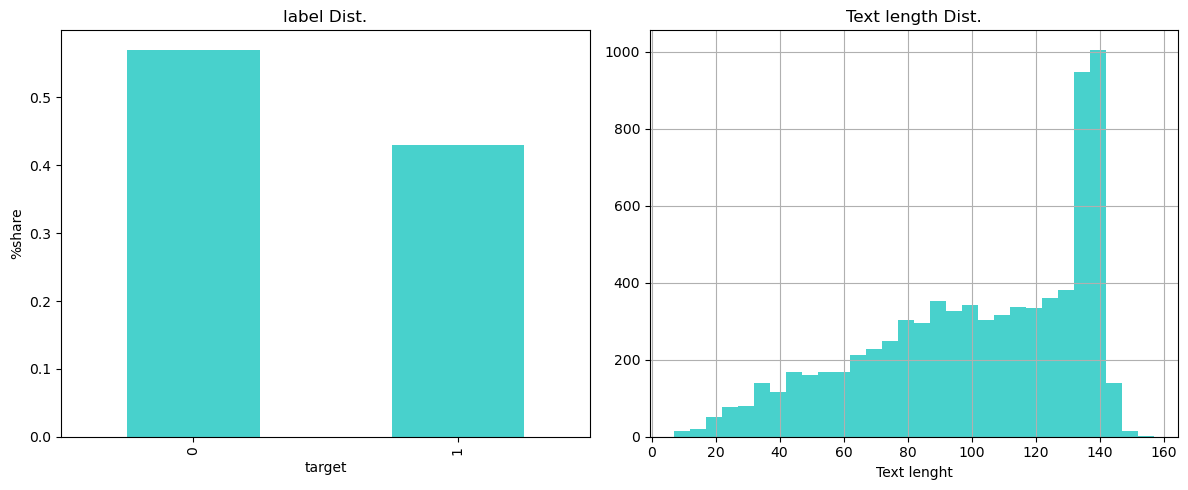

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df_train['target'].value_counts(normalize=True).plot(kind='bar', color='mediumturquoise', ax=axes[0])
axes[0].set_title('label Dist.')
axes[0].set_ylabel('%share')

df_train['text_length'].hist(bins=30, color='mediumturquoise', ax=axes[1])
axes[1].set_title('Text length Dist.')
axes[1].set_xlabel('Text lenght')

plt.tight_layout()
plt.show()

sample has quite balance data, sufficient for training.
Majority Tweet less than 135 length, some outliners on text above 135+

In [12]:
df_train[df_train['text_length'] >= 135]['text_length'].describe()

count    1754.000000
mean      138.094641
std         2.514566
min       135.000000
25%       136.000000
50%       138.000000
75%       139.000000
max       157.000000
Name: text_length, dtype: float64

In [13]:
df_train[df_train['text_length'] >= 135]['target'].value_counts()

target
1    945
0    809
Name: count, dtype: int64

we see similar distribution of long/short text in both actual disaster vs. non-disaster Tweet

### 3. Text vectorization process and decomposition methodology
now we need to decompose the text to count word's frequency in each text

In [14]:
#clean text:
#define stop words for across analysis, data cleaning & modeling:
#clean text with update set of stopwords:

sw1 = ["a","a's","able","about","above","according","http","https","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"]
sw1 = set(sw1)
sw = stopwords.words("english")
sw = set(sw)
stop_words = set.union(sw1, sw)

def clean_text(txt):
     
    #process numbers / money
    txt = txt.lower() # lowercase
    txt = re.sub('\W+', ' ', txt) #remove special character/punctuation (non-letter, non-digit)
    txt = txt.replace(" n ", "") #remove the brief of AND in both type of news
    txt = txt.replace("co", "") #remove the text in cited website appear in both type of news 
    txt = txt.replace("ad", "") #manual update on special case
    txt = txt.replace("amp", "") #merge
    txt = re.sub(r"http\S+", "", txt)  # Remove URLs
    txt = re.sub(r"<.*?>", "", txt)    # Remove HTML tags
    txt = re.sub(r"[%s]" % re.escape(string.punctuation), "", txt)  # Remove punctuation
    txt = re.sub(r"\n", " ", txt)
    txt = re.sub(r"\s+", " ", txt).strip()
    txt = re.sub('\s+', ' ', txt)   #s ~ space

    words = [w for w in word_tokenize(txt) if not w in stop_words] #gather all words in text that not stopwords
    words = [word for word in words if word.isalpha()]
    
    cleaned_text = ' '.join(words)
    return cleaned_text

In [15]:
#see distribution of repeated words in actual disaster
text_clean_1 = clean_text(str(df_train[df_train['target']==1]['text'].values.tolist()))
wordcloud = WordCloud(
                    width = 600, height = 300, random_state=42, background_color='black', colormap='Set3', collocations=False, normalize_plurals = False
                    ).generate(text_clean_1)

print(f'actual disaster denominator {len(wordcloud.words_)}')
print(f'words statistic in actual disaster: {wordcloud.words_}')

actual disaster denominator 200
words statistic in actual disaster: {'fire': 1.0, 'news': 0.7417582417582418, 'disaster': 0.6593406593406593, 'california': 0.6318681318681318, 'suicide': 0.6153846153846154, 'police': 0.5934065934065934, 'people': 0.5769230769230769, 'killed': 0.521978021978022, 'hiroshima': 0.5, 'storm': 0.47802197802197804, 'fires': 0.46703296703296704, 'crash': 0.46153846153846156, 'families': 0.44505494505494503, 'train': 0.4340659340659341, 'emergency': 0.4175824175824176, 'bomb': 0.4175824175824176, 'buildings': 0.41208791208791207, 'nuclear': 0.4010989010989011, 'de': 0.3791208791208791, 'attack': 0.3791208791208791, 'wildfire': 0.3791208791208791, 'accident': 0.37362637362637363, 'video': 0.36813186813186816, 'bombing': 0.3626373626373626, 'northern': 0.3516483516483517, 'burning': 0.3516483516483517, 'legionnaires': 0.33516483516483514, 'car': 0.32967032967032966, 'bomber': 0.32967032967032966, 'pm': 0.3241758241758242, 'war': 0.3241758241758242, 'year': 0.3186

In [16]:
#see distribution of repeated words in non disaster
text_clean_0 = clean_text(str(df_train[df_train['target']==0]['text'].values.tolist()))
wordcloud = WordCloud(
                    width = 600, height = 300, random_state=42, background_color='black', colormap='Set3', collocations=False, normalize_plurals = False
                    ).generate(text_clean_0)

print(f'non disaster denominator {len(wordcloud.words_)}')
print(f'words statistic in non disaster: {wordcloud.words_}')

non disaster denominator 200
words statistic in non disaster: {'body': 1.0, 'video': 0.8275862068965517, 'people': 0.8189655172413793, 'love': 0.7672413793103449, 'day': 0.7327586206896551, 'time': 0.7327586206896551, 'back': 0.7327586206896551, 'full': 0.7241379310344828, 'emergency': 0.6982758620689655, 'youtube': 0.646551724137931, 'fire': 0.6120689655172413, 'gt': 0.5862068965517241, 'man': 0.5689655172413793, 'good': 0.5689655172413793, 'world': 0.5431034482758621, 'na': 0.5431034482758621, 'life': 0.5258620689655172, 'lol': 0.5258620689655172, 'rt': 0.5172413793103449, 'burning': 0.49137931034482757, 'make': 0.4827586206896552, 'reddit': 0.47413793103448276, 'work': 0.46551724137931033, 'news': 0.46551724137931033, 'black': 0.41379310344827586, 'de': 0.4051724137931034, 'great': 0.39655172413793105, 'wreck': 0.39655172413793105, 'feel': 0.39655172413793105, 'hot': 0.39655172413793105, 'today': 0.3879310344827586, 'god': 0.3793103448275862, 'im': 0.3706896551724138, 'ass': 0.37068

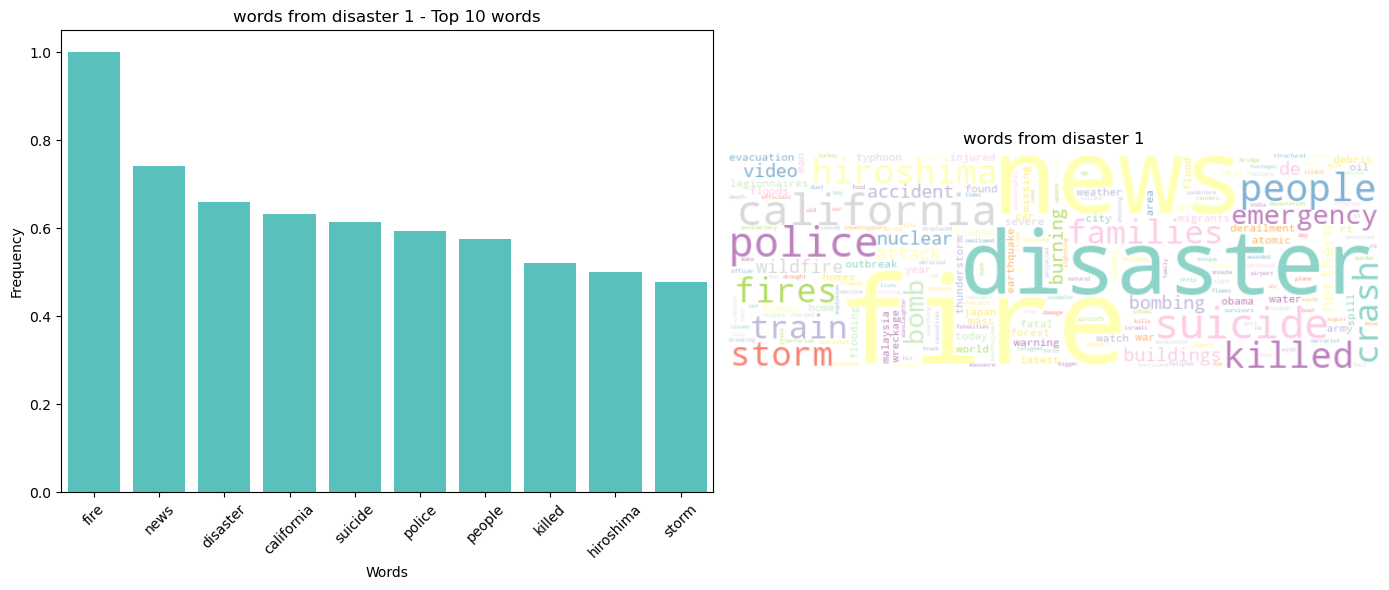

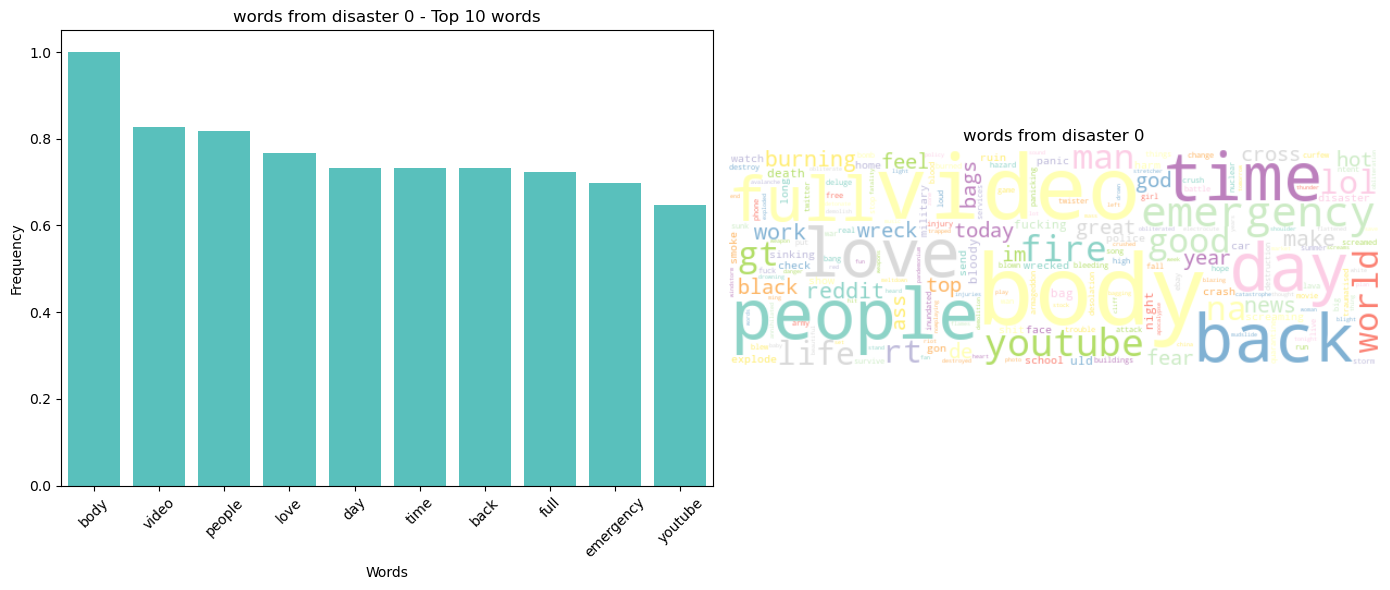

In [17]:
def plot_wordcloud_(text, title, n=10):
    # Create and Generate a Word Cloud Image
    wordcloud = WordCloud(
        width=600, height=200, random_state=42,
        background_color='white', colormap='Set3',
        collocations=False, normalize_plurals=False
    ).generate(text)

    top_words = pd.DataFrame(wordcloud.words_.items()).head(n)
    top_words.columns = ['word', 'freq']

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    sns.barplot(x='word', y='freq', data=top_words, color='mediumturquoise', ax=axes[0])
    axes[0].set(xlabel='Words', ylabel='Frequency', title=f'{title} - Top {n} words')
    axes[0].tick_params(axis='x', rotation=45)

    axes[1].imshow(wordcloud, interpolation='bilinear')
    axes[1].set_title(title, size=12)
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

for label in df_train['target'].unique():
    plot_wordcloud_(clean_text(str(df_train[df_train['target']==label]['text'].values.tolist())),f'words from disaster {label}')


in general, we see the tweet on actual disaster have more repeated of harsh/heavy words rather than positive words and majority including links to somewhere (present by https) as in non-disaster Tweet although both contain some similar word such as news or people...

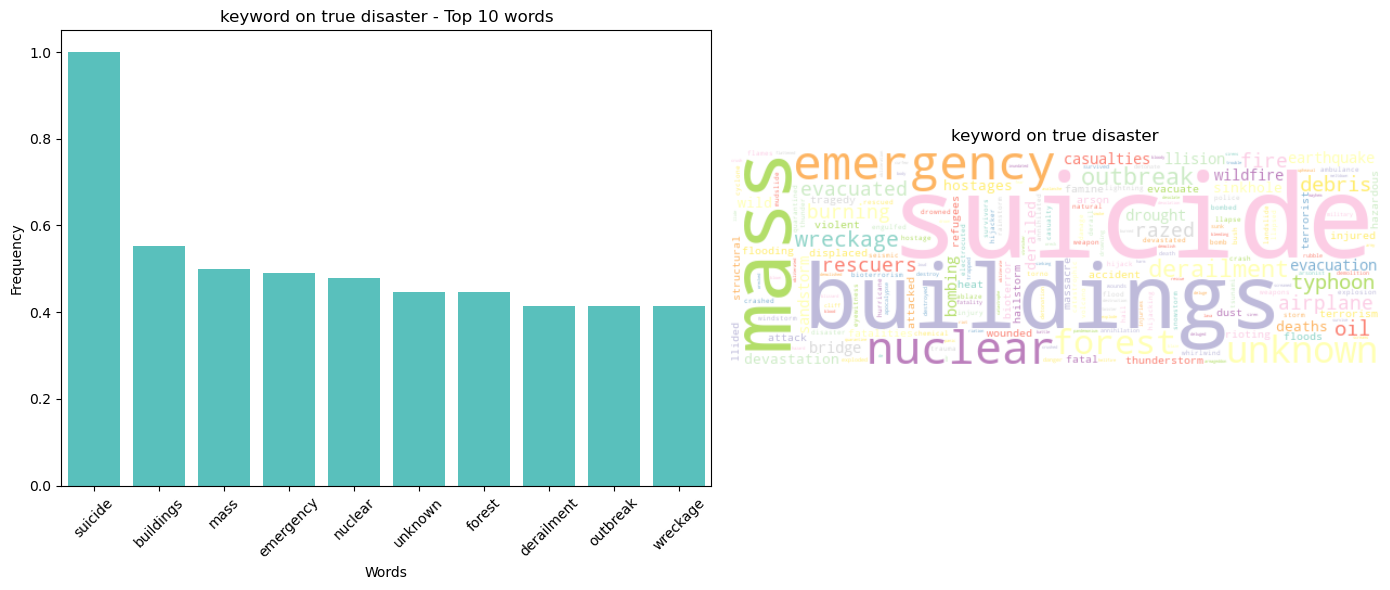

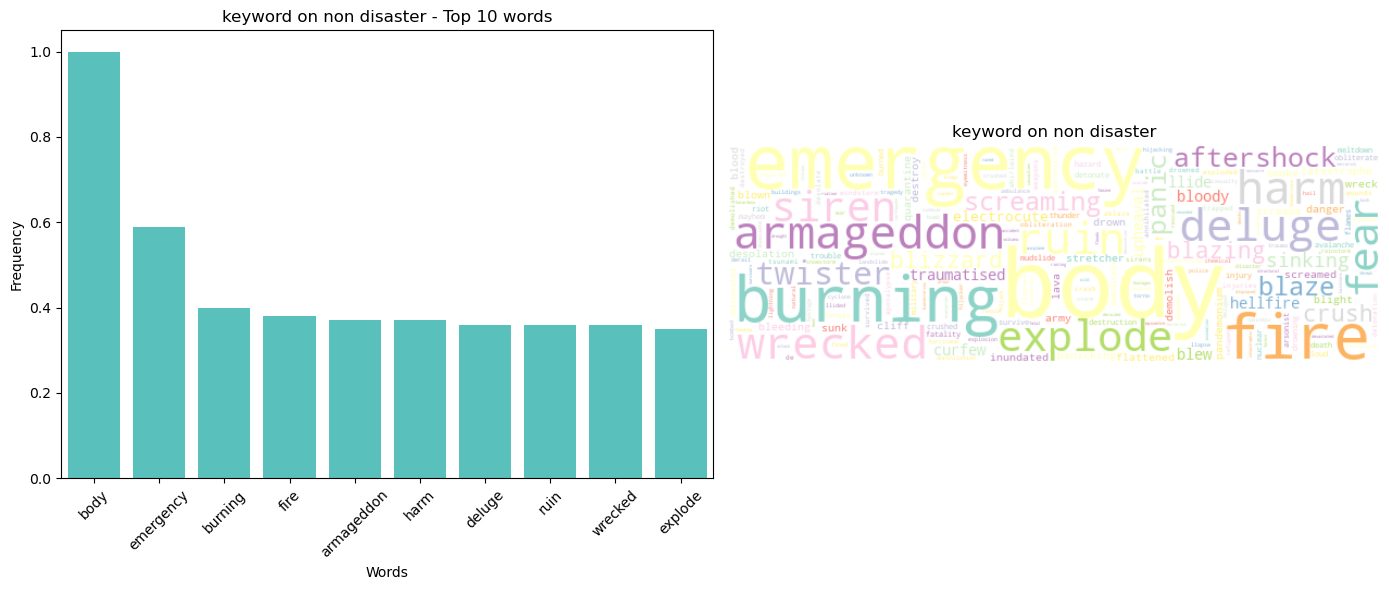

In [18]:
#check top keywords on each label
keyword_1 = clean_text(str(df_train[df_train['target']== 1]['keyword'].values.tolist()))
keyword_0 = clean_text(str(df_train[df_train['target']== 0]['keyword'].values.tolist()))

plot_wordcloud_(keyword_1, 'keyword on true disaster', n=10)
plot_wordcloud_(keyword_0, 'keyword on non disaster', n=10)

In [19]:
#analyze location
df_train[df_train['target']== 1]['location'].value_counts()

location
unknown                       1075
USA                             67
United States                   27
Nigeria                         22
India                           20
                              ... 
Northern Ireland                 1
Broomfield, CO                   1
KÌ¦ln, Nordrhein-Westfalen       1
Milton/Tallahassee               1
Manhattan, NY                    1
Name: count, Length: 1514, dtype: int64

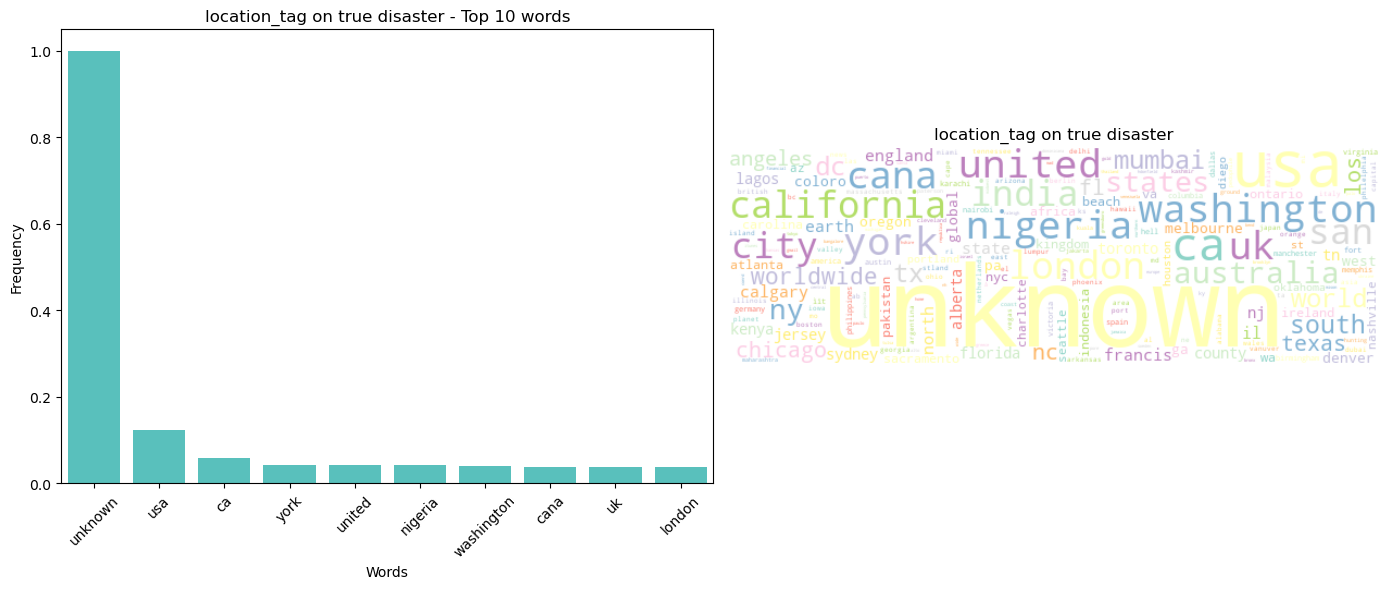

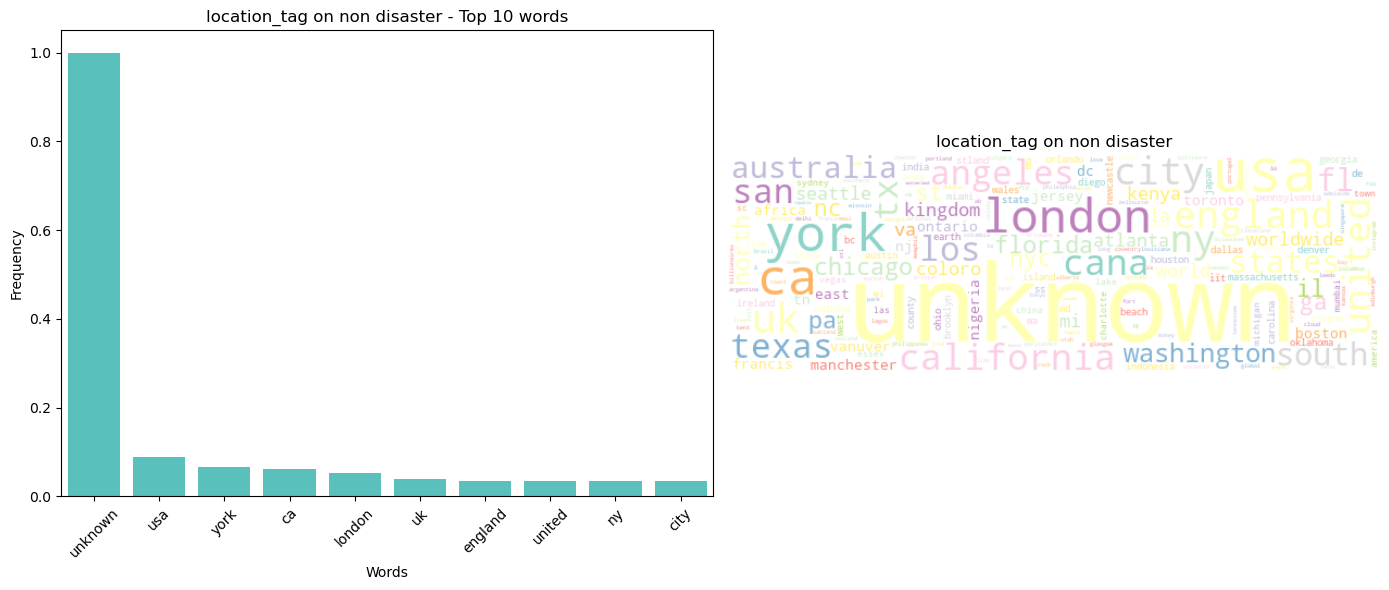

In [20]:
#check top location on each label
#check top keywords on each label
location_1 = clean_text(str(df_train[df_train['target']== 1]['location'].values.tolist()))
location_0 = clean_text(str(df_train[df_train['target']== 0]['location'].values.tolist()))

plot_wordcloud_(location_1, 'location_tag on true disaster', n=10)
plot_wordcloud_(location_0, 'location_tag on non disaster', n=10)

### 4. Data transformation and preprocessing for training model
next step, we will need to convert text in training set into vectors using TF-IDF method

In [21]:
# import spacy
# Preprocess our text setup
nlp = spacy.load('en_core_web_sm')

def preprocess(txt):
    doc = nlp(txt.lower())
    return ' '.join([token.lemma_ for token in doc if token.is_alpha and not token.is_stop])

df_train['text_clean'] = df_train['text'].apply(preprocess)

df_train['text_clean']

0                                                                     deed reason earthquake allah forgive
1                                                                    forest fire near la ronge sask canada
2                          resident ask shelter place notify officer evacuation shelter place order expect
3                                                      people receive wildfire evacuation order california
4                                                    get send photo ruby alaska smoke wildfire pour school
                                                       ...                                                
7608                                                          giant crane hold bridge collapse nearby home
7609                                                 control wild fire california northern state troubling
7610                                                                                   km s volcano hawaii
7611    police investigate e bike col

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           7613 non-null   int64 
 1   keyword      7613 non-null   object
 2   location     7613 non-null   object
 3   text         7613 non-null   object
 4   target       7613 non-null   int64 
 5   text_length  7613 non-null   int64 
 6   text_clean   7613 non-null   object
dtypes: int64(3), object(4)
memory usage: 416.5+ KB


# III) Model Architecture

In this project, we will process texts to matrix form (word embedding) using TF-IDF as it helps to filter out the stopwords (commonly repeated words) to ensure the remaining words is play crucial role in deliver key message which help to classify the text better, as well as efficient in vectorizing process.

Model will be trained using BERT as the transformer architecture will be used as alternative sequential neural network model to build and train data.

### 1. Model architecture

In [23]:
#baseline model architecture
preprocessor = keras_hub.models.DistilBertPreprocessor.from_preset('distil_bert_base_en_uncased', 
                                                                   sequence_length=128)

classifier = keras_hub.models.DistilBertClassifier.from_preset('distil_bert_base_en_uncased', 
                                                               num_classes=1,
                                                               preprocessor=preprocessor)

classifier.compile(loss=BinaryCrossentropy(from_logits=True), optimizer=Adam(learning_rate=1e-5), metrics=['accuracy'])

classifier.summary()

Preprocessor: "distil_bert_text_classifier_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                  ┃                                   Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ distil_bert_tokenizer (DistilBertTokenizer)                   │                       Vocab size: 30,522 │
└───────────────────────────────────────────────────────────────┴──────────────────────────────────────────┘

Model: "distil_bert_text_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ distil_bert_backbone          │ (None, None, 768)         │      66,362,880 │ padding_mask[0][0],        │
│ (DistilBertBackbone)          │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item (GetItem)            │ (None, 768)               │               0 │ distil_bert_backbone[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pooled_dense (Dense)          │ (None, 768)               │         590,592 │ get_item[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output_dropout (Dropout)      │ (None, 768)               │               0 │ pooled_dense[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 1)                 │             769 │ output_dropout[0][0]       │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 66,954,241 (255.41 MB)

 Trainable params: 66,954,241 (255.41 MB)

 Non-trainable params: 0 (0.00 B)

### 2. Model training and finetuning

In [24]:
X_temp, X_test, y_temp, y_test = train_test_split(df_train['text_clean'], df_train['target'], test_size=0.1, stratify=df_train['target']) #change sample size
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, stratify=y_temp) #change sample size

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

final_model = classifier.fit(x=X_train.tolist(), y=y_train.astype('float32').values, 
               validation_data=(X_val.tolist(), y_val.astype('float32').values), 
               batch_size=32, epochs=10, callbacks=[early_stop])

Epoch 1/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 1162s 6s/step - accuracy: 0.7252 - loss: 0.5287 - val_accuracy: 0.7974 - val_loss: 0.4477
Epoch 2/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 1170s 6s/step - accuracy: 0.8285 - loss: 0.4055 - val_accuracy: 0.8265 - val_loss: 0.4308
Epoch 3/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 1170s 6s/step - accuracy: 0.8526 - loss: 0.3646 - val_accuracy: 0.8265 - val_loss: 0.4345
Epoch 4/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 1215s 6s/step - accuracy: 0.8710 - loss: 0.3293 - val_accuracy: 0.8105 - val_loss: 0.4499


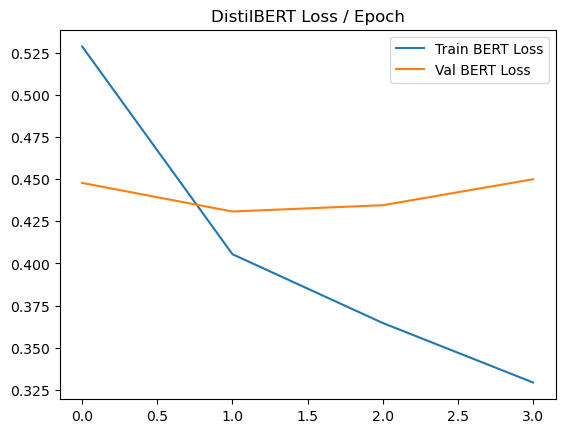

In [25]:
plt.plot(final_model.history['loss'], label='Train BERT Loss')
plt.plot(final_model.history['val_loss'], label='Val BERT Loss')
plt.title('DistilBERT Loss / Epoch')
plt.legend()

### 3. Model evaluation

In [40]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model, val_data, batch_size=32, threshold=0.5):
    # Unpack validation data
    X_val_, y_val_ = val_data

    # If labels are one-hot encoded, convert to 1D
    if y_val_.ndim == 2 and y_val_.shape[1] == 2:
        y_val_ = np.argmax(y_val_, axis=1)

    # Predictions
    val_predictions = model.predict(X_val_, batch_size=batch_size)

    # Handle softmax vs sigmoid outputs
    if val_predictions.ndim == 2 and val_predictions.shape[1] == 2:
        # Softmax case: pick highest probability
        val_pred_classes = np.argmax(val_predictions, axis=1)
        # For ROC-AUC, use probability of positive class
        val_predictions = val_predictions[:, 1]
    else:
        # Sigmoid case: threshold at 0.5
        val_pred_classes = (val_predictions > threshold).astype(int).flatten()
        val_predictions = val_predictions.flatten()

    # True labels
    true_labels = y_val_

    # Ensure lengths match
    val_pred_classes = val_pred_classes[:len(true_labels)]
    val_predictions = val_predictions[:len(true_labels)]

    # Metrics
    metrics = {
        "accuracy": accuracy_score(true_labels, val_pred_classes),
        "precision": precision_score(true_labels, val_pred_classes),
        "recall": recall_score(true_labels, val_pred_classes),
        "f1": f1_score(true_labels, val_pred_classes),
        "roc_auc": roc_auc_score(true_labels, val_predictions)
    }

    for k, v in metrics.items():
        print(f"{k.capitalize()}: {v:.4f}")

    return metrics

In [ ]:
# Usage
val_data = (X_test, y_test)
baseline_result = evaluate_model(classifier, val_data)

baseline model perform pretty good using Keras_hub library, we will tune to a comparable model using upgraded keras_npl library with some adjustment to understand which elements are driving result

### 4.1 train with keras npl using loss function for multi class

In [24]:
import keras_nlp

In [25]:
# MODEL ARCHITECT:

preset= "distil_bert_base_en_uncased"

# Use a shorter sequence length.
preprocessor_ = keras_nlp.models.DistilBertPreprocessor.from_preset(preset,
                                                                   sequence_length=128, 
                                                                   name="preprocessor_4_tweets"
                                                                  )

# Pretrained classifier.
classifier_npl = keras_nlp.models.DistilBertClassifier.from_preset(preset,
                                                               preprocessor = preprocessor_, 
                                                               num_classes=2) 

classifier_npl.summary()

Preprocessor: "preprocessor_4_tweets"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                  ┃                                   Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ distil_bert_tokenizer (DistilBertTokenizer)                   │                       Vocab size: 30,522 │
└───────────────────────────────────────────────────────────────┴──────────────────────────────────────────┘

Model: "distil_bert_text_classifier_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ distil_bert_backbone          │ (None, None, 768)         │      66,362,880 │ padding_mask[0][0],        │
│ (DistilBertBackbone)          │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item_1 (GetItem)          │ (None, 768)               │               0 │ distil_bert_backbone[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pooled_dense (Dense)          │ (None, 768)               │         590,592 │ get_item_1[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output_dropout (Dropout)      │ (None, 768)               │               0 │ pooled_dense[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 2)                 │           1,538 │ output_dropout[0][0]       │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 66,955,010 (255.41 MB)

 Trainable params: 66,955,010 (255.41 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
from tensorflow import keras

In [33]:
# TRAIN WITH KERAS_NPL --use same set of training/validation of baseline model to compare result

classifier_npl.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=["accuracy"]) #use different loss

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

# Fit on same set from keras_hub model
model_npl = classifier_npl.fit(x=X_train.values, y=y_train.values,
                             batch_size=32,
                             epochs=10, 
                             validation_data=(X_val, y_val),
                             callbacks=[early_stop]
                            )


Epoch 1/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 1137s 6s/step - accuracy: 0.5554 - loss: 0.6962 - val_accuracy: 0.5700 - val_loss: 0.6864
Epoch 2/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 1373s 7s/step - accuracy: 0.5697 - loss: 0.6866 - val_accuracy: 0.5700 - val_loss: 0.6843
Epoch 3/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 1444s 7s/step - accuracy: 0.5710 - loss: 0.6848 - val_accuracy: 0.5700 - val_loss: 0.6941
Epoch 4/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 1129s 6s/step - accuracy: 0.5642 - loss: 0.6862 - val_accuracy: 0.5700 - val_loss: 0.6850


thanks to early stopping we prevent losing time when no improvement.

### 4.2 training with keras hub using loss function for binary class

In [34]:
# update loss function
classifier_npl2 = keras_nlp.models.DistilBertClassifier.from_preset(preset,
                                                               preprocessor = preprocessor_, 
                                                               num_classes=1) #1 update loss function, change the class to 1

classifier_npl2.summary()

Preprocessor: "preprocessor_4_tweets"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                  ┃                                   Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ distil_bert_tokenizer (DistilBertTokenizer)                   │                       Vocab size: 30,522 │
└───────────────────────────────────────────────────────────────┴──────────────────────────────────────────┘

Model: "distil_bert_text_classifier_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ distil_bert_backbone          │ (None, None, 768)         │      66,362,880 │ padding_mask[0][0],        │
│ (DistilBertBackbone)          │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item_2 (GetItem)          │ (None, 768)               │               0 │ distil_bert_backbone[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pooled_dense (Dense)          │ (None, 768)               │         590,592 │ get_item_2[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output_dropout (Dropout)      │ (None, 768)               │               0 │ pooled_dense[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 1)                 │             769 │ output_dropout[0][0]       │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 66,954,241 (255.41 MB)

 Trainable params: 66,954,241 (255.41 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
#train updated loss function model, everything else same
classifier_npl2.compile(loss=BinaryCrossentropy(from_logits=True), optimizer='adam', metrics=["accuracy"])

# Fit on same set from keras_hub model
model_npl2 = classifier_npl2.fit(x=X_train.values, y=y_train.values,
                             batch_size=32,
                             epochs=10, 
                             validation_data=(X_val, y_val),
                             callbacks=[early_stop]
                            )

Epoch 1/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 1129s 6s/step - accuracy: 0.5700 - loss: 0.6890 - val_accuracy: 0.5700 - val_loss: 0.6859
Epoch 2/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 1441s 7s/step - accuracy: 0.5703 - loss: 0.6851 - val_accuracy: 0.5700 - val_loss: 0.6835
Epoch 3/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 1211s 6s/step - accuracy: 0.5703 - loss: 0.6846 - val_accuracy: 0.5700 - val_loss: 0.6835
Epoch 4/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 1297s 7s/step - accuracy: 0.5703 - loss: 0.6854 - val_accuracy: 0.5700 - val_loss: 0.6833
Epoch 5/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 1495s 8s/step - accuracy: 0.5703 - loss: 0.6848 - val_accuracy: 0.5700 - val_loss: 0.6835
Epoch 6/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 2477s 13s/step - accuracy: 0.5703 - loss: 0.6848 - val_accuracy: 0.5700 - val_loss: 0.6837


# IV) Results and Analysis

as we use alternative model above without performance improvement, we will finetuning the baseline model by update text processing.

### 1. Model enhancement
as previous approach we used the model with training only on refining text in Tweets without using of keywords and location extraction. In this part we will explore enhancement in data processing, use same model with hyperparams finetuning to see the performance

In [27]:
#refining text function

def get_keywords(topic: str) -> List:
    related_words = []
    link = f'https://relatedwords.io/{topic}'

    try:
        response = requests.get(link, timeout=5)
        response.raise_for_status()
    except requests.Timeout:
        print(f'Timeout Error: {e}')
    except requests.RequestException as e:
        print(f'Request failed: {e}')

    # use soup to extract all words!
    soup = BeautifulSoup(response.content, 'html.parser')

    for a in soup.find_all('a'):
        word = a.text.strip().lower()
        if word.isalpha():
            related_words.append(word)

    return [preprocess(word) for word in related_words]


topics = ['disaster', 'terrorism', 'war']
keywords = []

for topic in topics:
    keywords.extend(get_keywords(topic))

keywords = {word for word in keywords if word}

print(sorted(list(keywords))[:40])
print('Size:', len(keywords))

['abb', 'abuse', 'abusive', 'accident', 'accuse', 'act', 'action', 'active', 'activity', 'adventure', 'adversity', 'affect', 'afflict', 'affliction', 'afghanistan', 'aftermath', 'agency', 'agenda', 'aggravation', 'aggression', 'ago', 'aiai', 'aid', 'ail', 'aim', 'algebra', 'algeria', 'alien', 'alir', 'allege', 'ally', 'annihilation', 'ano', 'ant', 'antagonism', 'anti', 'antisemitism', 'antiterrorism', 'antiterrorist', 'antiwar']
Size: 942


In [28]:
# vectorizing process by TF-IDF
vector = TfidfVectorizer()
X = vector.fit_transform(df_train['text_clean'])
vocab = vector.get_feature_names_out()

loc_words = set()
docs = list(nlp.pipe([f'I am in {w}' for w in vocab]))
for word, doc in zip(vocab, docs):
    if any(ent.label_ == 'GPE' for ent in doc.ents):
        loc_words.add(word)

def get_key(text, r_idx, loc=False):
    og_tokens = set(text.iloc[r_idx].split())
    row = X[r_idx].toarray()[0]
    sorted_idx = row.argsort()[::-1] # take largest
    for idx in sorted_idx:
        can = vocab[idx]
        if not loc and can in keywords and can in og_tokens: #utilize keyword
            return can
        elif loc and can in loc_words and can in og_tokens: #utilize location
            return can
    return 'No Keyword'

df_train['keyword'] = [get_key(df_train['text_clean'], i) for i in range(len(df_train))]
df_train['location'] = [get_key(df_train['text_clean'], i, True) for i in range(len(df_train))]

In [31]:
#check model without using combined text
classifier_ = keras_hub.models.DistilBertClassifier.from_preset('distil_bert_base_en_uncased', 
                                                               num_classes=1,
                                                               preprocessor=preprocessor) #use the preprocessor as in baseline setup

classifier_.compile(loss=BinaryCrossentropy(from_logits=True), optimizer=Adam(learning_rate=1e-5), metrics=['accuracy'])

df_train['clean_all'] = ('keyword: ' + df_train['keyword'] + ' location: ' + df_train['location'] + ' text: ' + df_train['text_clean'])

# training on new split for input as new text clean process
X_temp, X_test, y_temp, y_test = train_test_split(df_train['clean_all'], df_train['target'], test_size=0.1, stratify=df_train['target']) 
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, stratify=y_temp) 

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

hyper_model = classifier_.fit(x=X_train.tolist(), y=y_train.astype('float32').values, 
               validation_data=(X_val.tolist(), y_val.astype('float32').values), 
               batch_size=32, epochs=10, callbacks=[early_stop])

Epoch 1/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 2399s 12s/step - accuracy: 0.7371 - loss: 0.5183 - val_accuracy: 0.7843 - val_loss: 0.5071
Epoch 2/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 2280s 12s/step - accuracy: 0.8250 - loss: 0.4160 - val_accuracy: 0.8061 - val_loss: 0.5001
Epoch 3/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 2310s 12s/step - accuracy: 0.8469 - loss: 0.3697 - val_accuracy: 0.8163 - val_loss: 0.5078
Epoch 4/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 1569s 8s/step - accuracy: 0.8626 - loss: 0.3395 - val_accuracy: 0.8265 - val_loss: 0.4792
Epoch 5/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 1584s 8s/step - accuracy: 0.8806 - loss: 0.3093 - val_accuracy: 0.8076 - val_loss: 0.5046
Epoch 6/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 1593s 8s/step - accuracy: 0.8988 - loss: 0.2732 - val_accuracy: 0.8032 - val_loss: 0.5544


**compare to baseline model, we see performance being boosted better (reaching smaller loss to 0.2 vs. baseline model 0.3). However as input more complex it takes more epoch to reach this optimal**

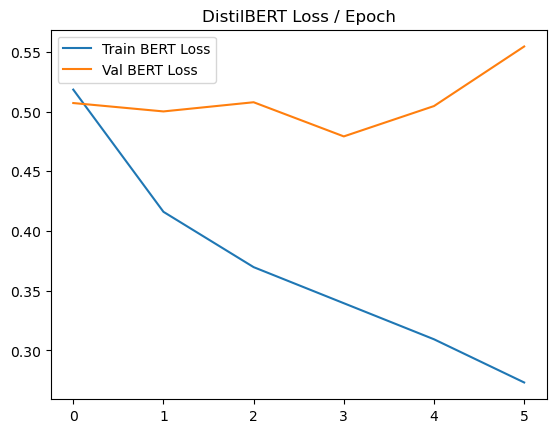

In [32]:
plt.plot(hyper_model.history['loss'], label='Train BERT Loss')
plt.plot(hyper_model.history['val_loss'], label='Val BERT Loss')
plt.title('DistilBERT Loss / Epoch')
plt.legend()

### 2. Model evaluation

In [38]:
y_pred_train_ = classifier_.predict(X_train)
y_pred_val_ = classifier_.predict(X_val)

193/193 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step


In [42]:
val_data = (X_test, y_test)
hypermodel_result = evaluate_model(classifier_, val_data)

24/24 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step
Accuracy: 0.8215
Precision: 0.8152
Recall: 0.7554
F1: 0.7841
Roc_auc: 0.8846


accuracy look good, let's predict the test sample and see result in Kaggle

### 3. Model prediction on Test sample

In [43]:
df_test = pd.read_csv('test.csv')
df_test['text_clean'] = df_test['text'].apply(preprocess)

# TF-IDF
X = vector.transform(df_test['text_clean'])
vocab = vector.get_feature_names_out()

loc_words = set()
docs = list(nlp.pipe([f'I am in {w}' for w in vocab]))
for word, doc in zip(vocab, docs):
    if any(ent.label_ == 'GPE' for ent in doc.ents):
        loc_words.add(word)

df_test['keyword'] = [get_key(df_test['text_clean'], i) for i in range(len(df_test))]
df_test['location'] = [get_key(df_test['text_clean'], i, True) for i in range(len(df_test))]

df_test['clean_all'] = ('keyword: ' + df_test['keyword'] + 
                 ' location: ' + df_test['location'] + 
                 ' text: ' + df_test['text'])

submission_ = (classifier_.predict(df_test['clean_all']) > 0.5).astype(int)

submission_df = pd.DataFrame({
    'id': df_test['id'],
    'target': submission_.flatten()
})

submission_df.to_csv('submission_2.csv', index=False)


102/102 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step


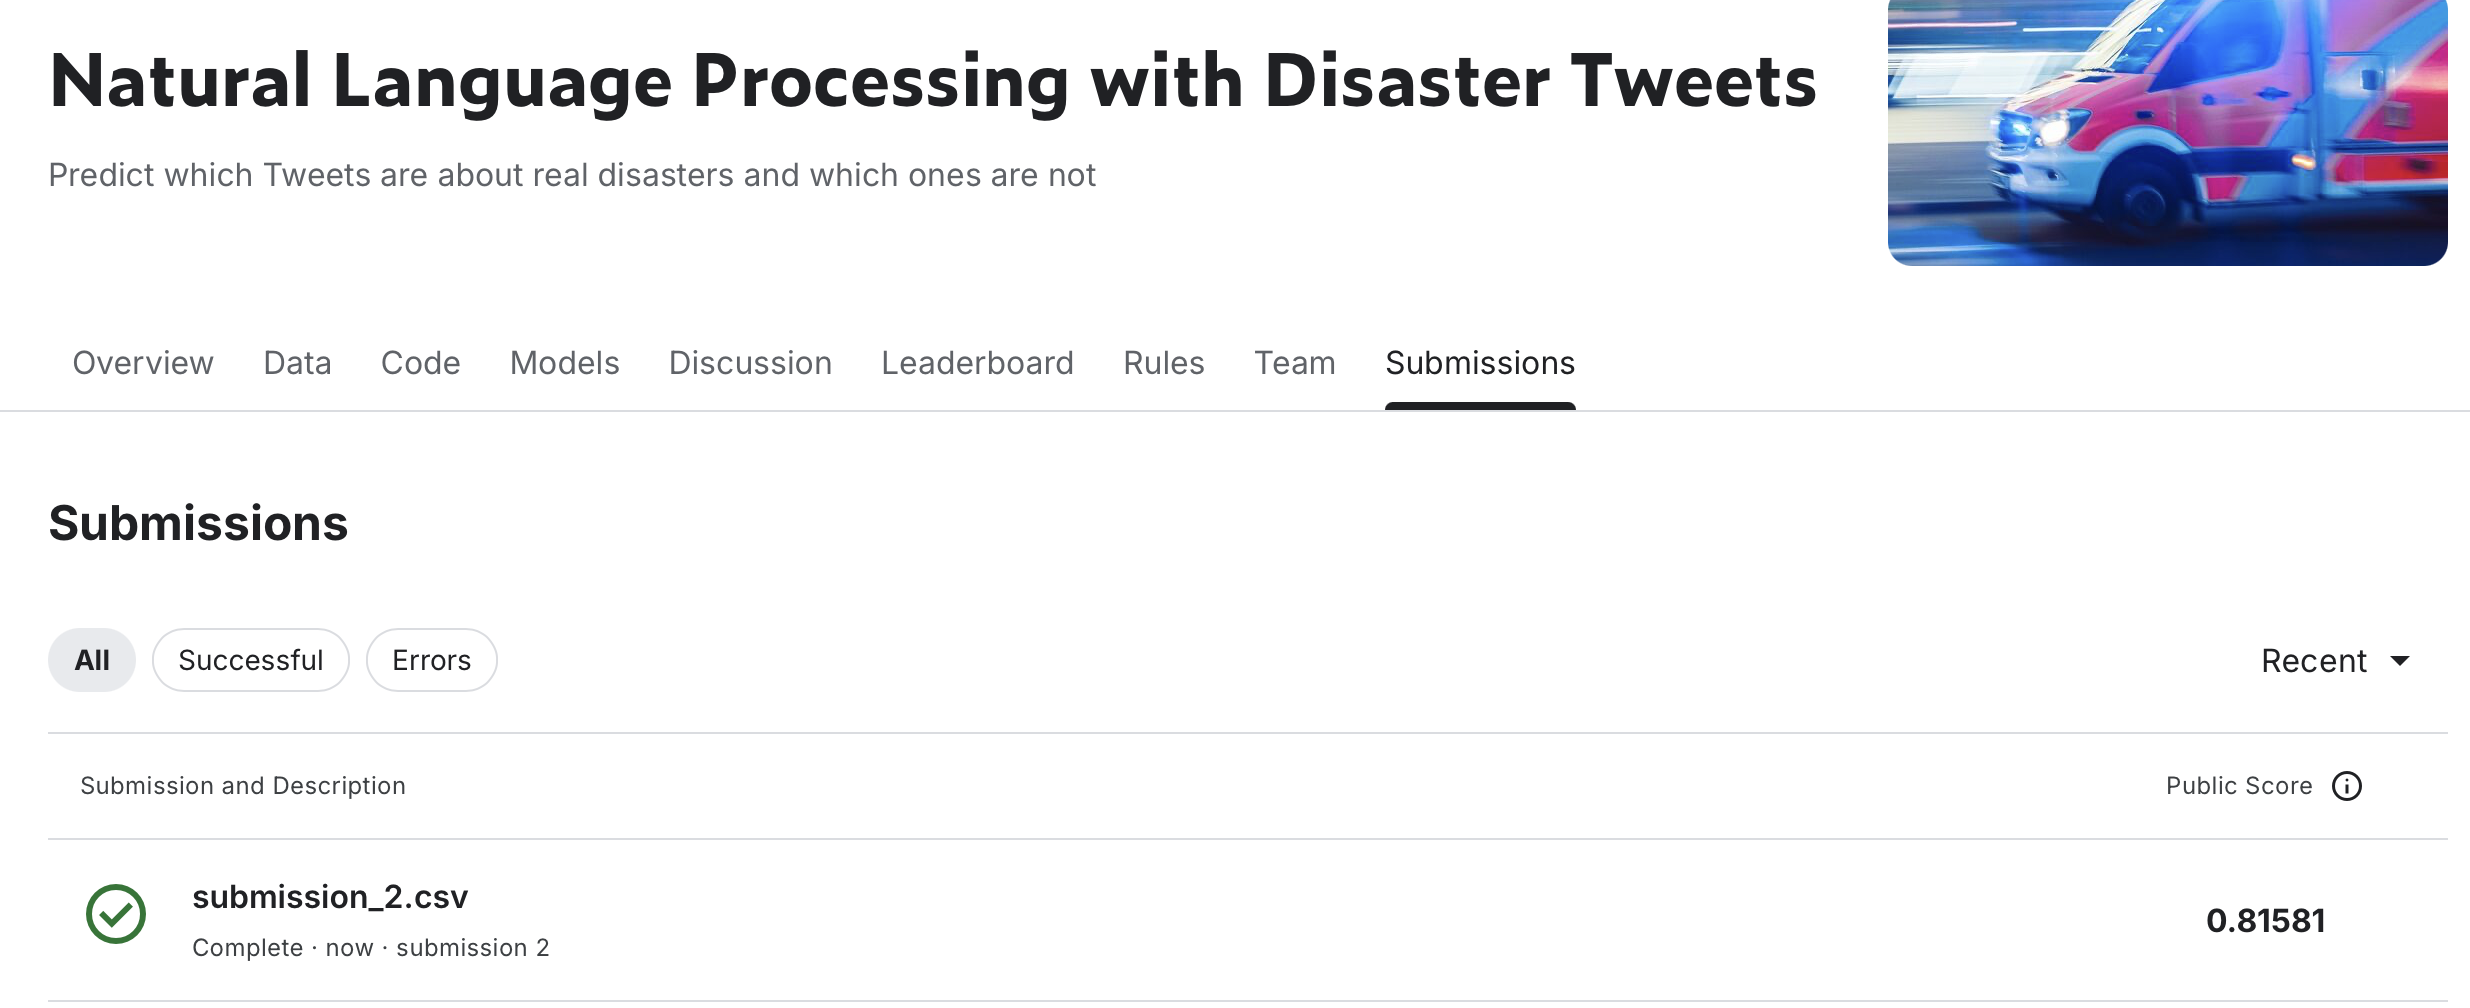

In [45]:
# import result after submit to Kaggle
from IPython.display import Image, display
display(Image(filename='submit 2.png'))

# V) Conclusion 



From result of baseline model and hyper model, we can see major step can help to improve model performance as following:
1) process of text cleaning place an important role for model training, if training text is not carefully handle, poluted data made model learning very inefficient; result proven in baseline model submit reach 0.8 accuracy score but in refine approach, score improve to 0.81
2) library using for model training also place significant impact on model prediction result. Despite same number of parameter, the core function and respective algorithm inside the applied library place key role to boost model performance, i.e keras_npl process less efficient vs. keras_hub
3) early stop is important to manage efficiency, avoid wasting time on additional epoch without significant improvement
4) loss function play important role in model training, for purpose of binary classify, use loss function BinaryCrossentropy with activation function using Sigmoid help model perform better than SparseCategoricalCrossentropy using activation function Softmax --which is more suitable for classify multiple classes.

**Future work**
some further work can be done: 
1) try 3 different learning rate to test model's efficient.
2) using AdamW as optimizer vs. Adam to generalize model to reduce overfitting effect.

# VI) Produce Deliverables: High-Quality, Organized Jupyter Notebook Report, GitHub Repository, and screenshot of Kaggle leaderboard 




### This work inspired by these references:
1. Stopword List : https://github.com/6/stopwords-json/blob/master/dist/en.json & https://quantrimang.com/hoc/regex-trong-python-165471
2. Keras https://keras.io/guides/keras_nlp/getting_started/
3. keras_hub: https://keras.io/keras_hub/presets/ through https://www.kaggle.com/code/georgemaslov/bert-tweets
4. keras_npl: https://www.kaggle.com/competitions/nlp-getting-started

### Github link: 
https://github.com/GabyVothy/DeepLearning/blob/main/NPL%20project_submit.ipynb

### in leaderboard:


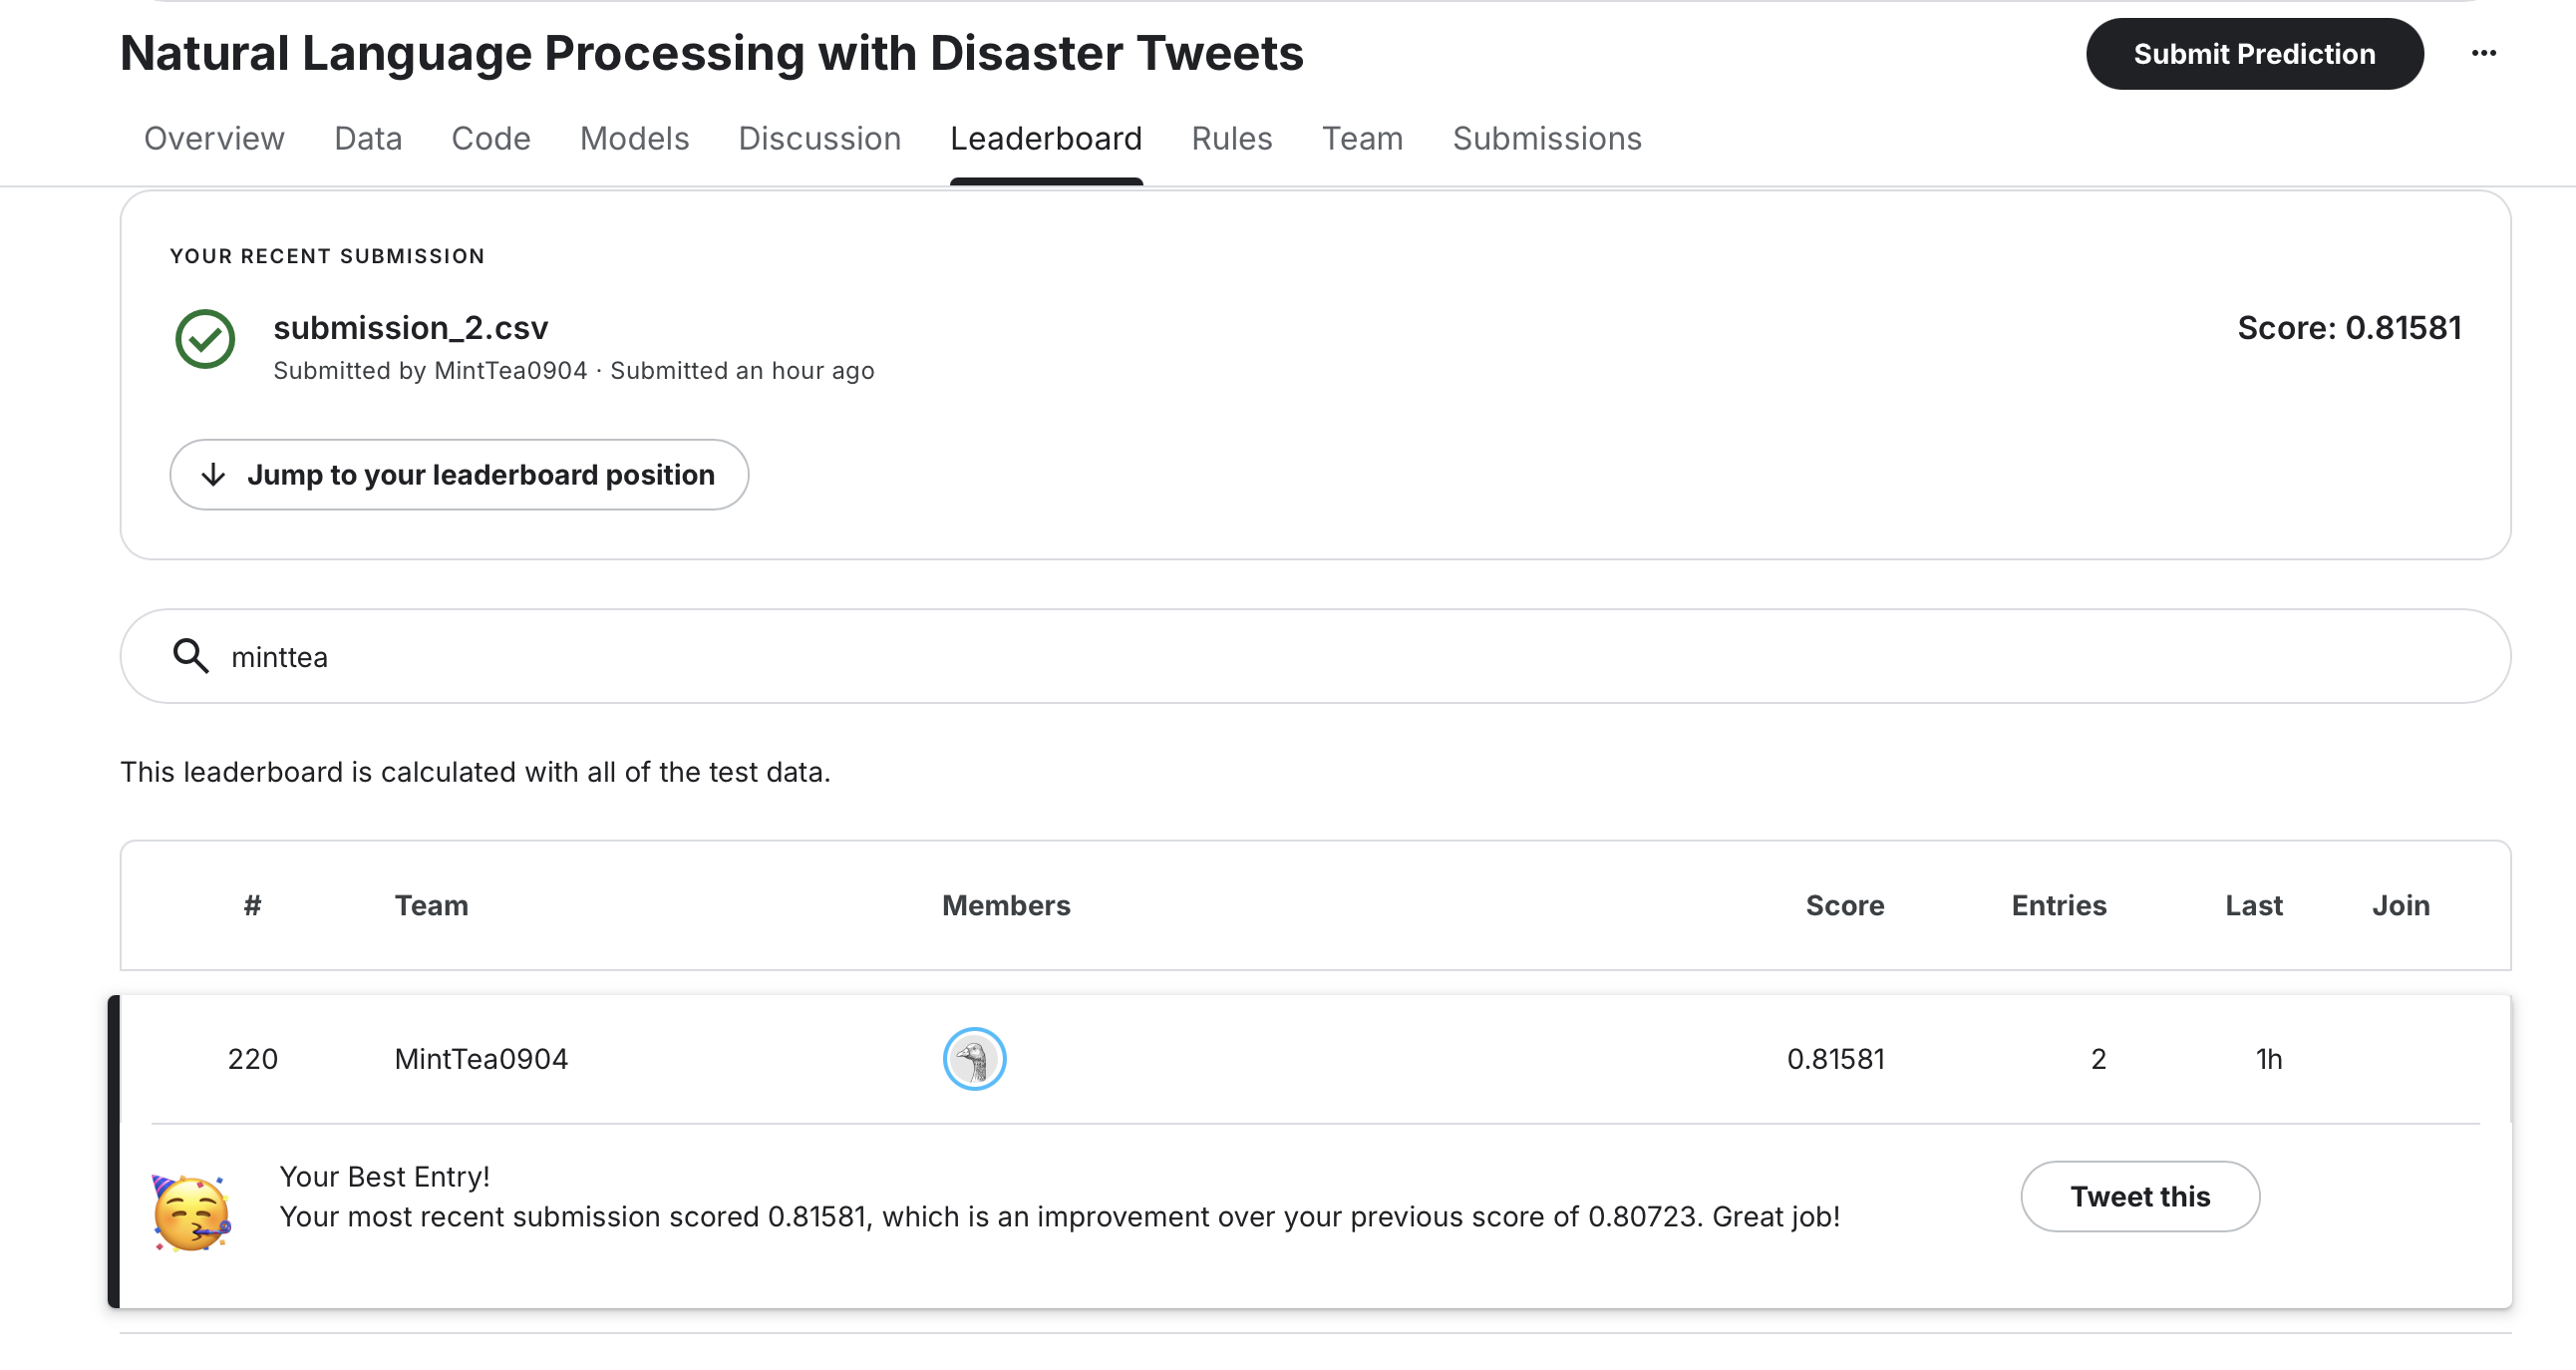

In [47]:
from IPython.display import Image, display
display(Image(filename='leaderboard.png'))